In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
from scipy import stats 
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [5]:
positive_df = train_df[train_df['Response']==1]

In [6]:
for i in range(4):
    train_df = pd.concat([train_df,positive_df],axis=0)

In [7]:
train_df['Response'].value_counts()

0    334399
1    233550
Name: Response, dtype: int64

In [8]:
test_df = pd.read_csv('test.csv')

In [9]:
test_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [10]:
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

In [11]:
train_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381057,Male,40,1,46.0,0,1-2 Year,Yes,27508.0,26.0,189,1
381061,Female,41,1,28.0,0,1-2 Year,Yes,37377.0,124.0,99,1
381073,Female,46,1,28.0,0,1-2 Year,Yes,34741.0,124.0,167,1
381075,Female,61,1,28.0,0,1-2 Year,Yes,43875.0,26.0,139,1


In [12]:
train_df['Gender'] = np.where(train_df['Gender']=='Male',1,0)
test_df['Gender'] = np.where(test_df['Gender']=='Male',1,0)

In [13]:
train_df['Vehicle_Age'] = train_df['Vehicle_Age'].map({'1-2 Year' : 1, '< 1 Year':0, '> 2 Years':2})
test_df['Vehicle_Age'] = test_df['Vehicle_Age'].map({'1-2 Year' : 1, '< 1 Year':0, '> 2 Years':2})

In [14]:
train_df['Vehicle_Damage'] = np.where(train_df['Vehicle_Damage']=='Yes',1,0)
test_df['Vehicle_Damage'] = np.where(test_df['Vehicle_Damage']=='Yes',1,0)

In [15]:
train_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381057,1,40,1,46.0,0,1,1,27508.0,26.0,189,1
381061,0,41,1,28.0,0,1,1,37377.0,124.0,99,1
381073,0,46,1,28.0,0,1,1,34741.0,124.0,167,1
381075,0,61,1,28.0,0,1,1,43875.0,26.0,139,1


In [16]:
def age_discrete(age):
    if age < 30:
        return 0
    elif age < 40:
        return 1
    elif age < 50:
        return 2
    elif age <60:
        return 3
    elif age <70:
        return 4
    elif age< 80:
        return 5
    else:
        return 6
    

In [17]:
train_df['Age'] = train_df['Age'].apply(lambda x: age_discrete(x))
test_df['Age'] = test_df['Age'].apply(lambda x: age_discrete(x))

In [18]:
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()

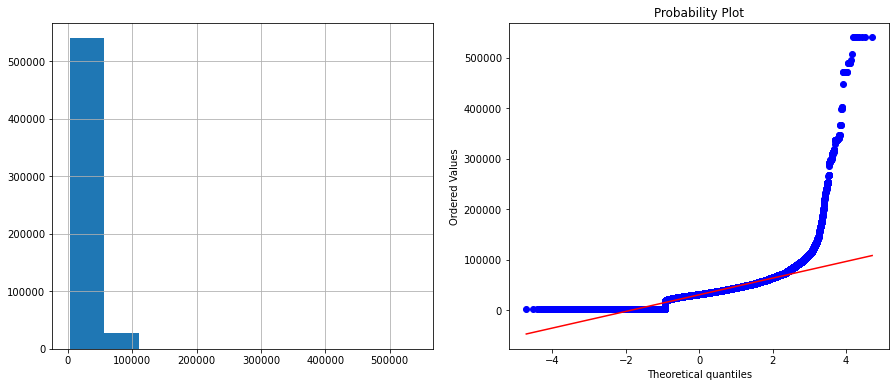

In [19]:
diagnostic_plots(train_df, 'Annual_Premium')

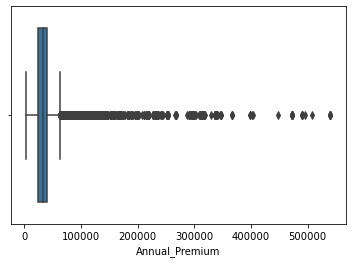

In [20]:
sns.boxplot(x='Annual_Premium',data=train_df)

In [21]:
IQR = train_df['Annual_Premium'].quantile(0.75) - train_df['Annual_Premium'].quantile(0.25)
up_bond = train_df['Annual_Premium'].quantile(0.75) + (IQR * 1.5)
low_bond = train_df['Annual_Premium'].quantile(0.25) - (IQR * 1.5)


train_df['cap_out_Annual_Premium'] = np.where((train_df['Annual_Premium']>up_bond) | (train_df['Annual_Premium']<low_bond) ,1,0)
test_df['cap_out_Annual_Premium'] = np.where((test_df['Annual_Premium']>up_bond) | (test_df['Annual_Premium']<low_bond) ,1,0)

upper_bond = train_df['Annual_Premium'].quantile(0.75) + (IQR * 3)
lower_bond = train_df['Annual_Premium'].quantile(0.25) - (IQR * 3)

train_df = train_df[train_df['Annual_Premium']<upper_bond]
train_df = train_df[train_df['Annual_Premium']>lower_bond]


train_df['Annual_Premium'] = np.where(train_df['Annual_Premium']>up_bond,up_bond,train_df['Annual_Premium'])
train_df['Annual_Premium'] = np.where(train_df['Annual_Premium']<low_bond,low_bond,train_df['Annual_Premium'])

test_df['Annual_Premium'] = np.where(test_df['Annual_Premium']>up_bond,up_bond,test_df['Annual_Premium'])
test_df['Annual_Premium'] = np.where(test_df['Annual_Premium']<low_bond,low_bond,test_df['Annual_Premium'])

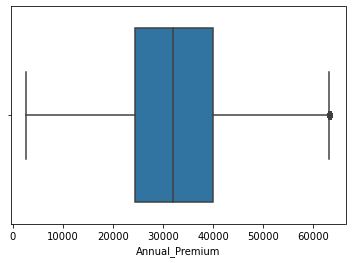

In [22]:
sns.boxplot(x='Annual_Premium',data=train_df)

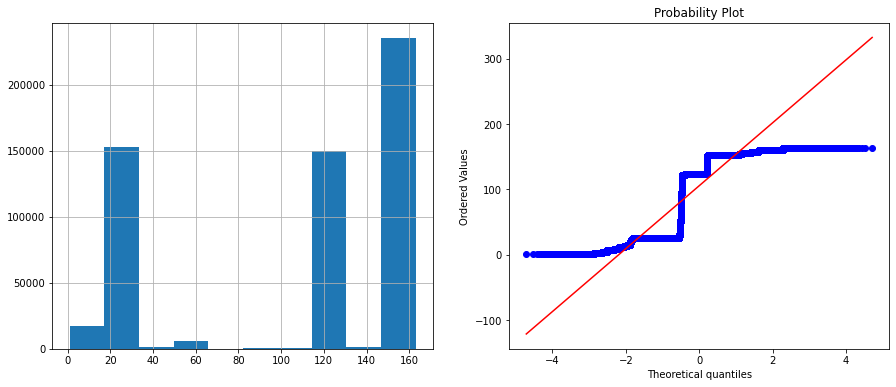

In [23]:
diagnostic_plots(train_df, 'Policy_Sales_Channel')

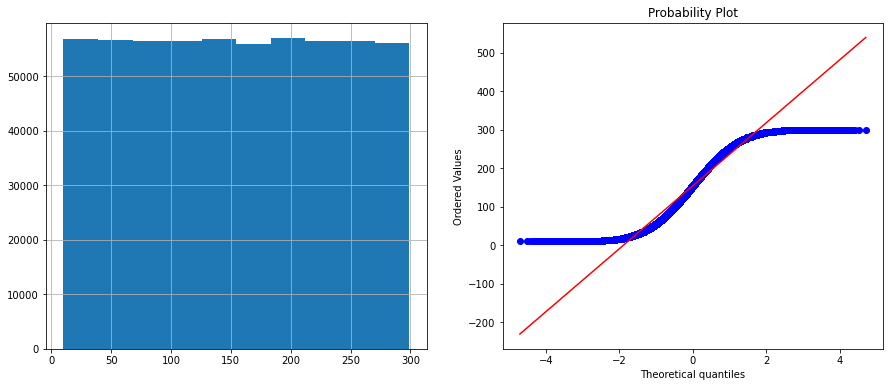

In [24]:
diagnostic_plots(train_df, 'Vintage')

In [25]:
def vintage_discrete(age):
    if age < 50:
        return 0
    elif age < 100:
        return 1
    elif age < 150:
        return 2
    elif age <200:
        return 3
    elif age <250:
        return 4
    elif age< 300:
        return 5

In [26]:
train_df['Vintage'] = train_df['Vintage'].apply(lambda x: vintage_discrete(x))
test_df['Vintage'] = test_df['Vintage'].apply(lambda x: vintage_discrete(x))

In [27]:
length = len(train_df)

In [28]:
Region_code = pd.concat([train_df['Region_Code'],test_df['Region_Code']],axis=0)

Region_code = pd.get_dummies(Region_code,drop_first=True)

Region_code_train = Region_code[:length]
Region_code_test = Region_code[length:]

train_df['Policy_Sales_Channel'] = train_df['Policy_Sales_Channel'].apply(lambda x: x+100)
test_df['Policy_Sales_Channel'] = test_df['Policy_Sales_Channel'].apply(lambda x: x+100)

Policy_Sales_Channel = pd.concat([train_df['Policy_Sales_Channel'],test_df['Policy_Sales_Channel']],axis=0)

Policy_Sales_Channel = pd.get_dummies(Policy_Sales_Channel,drop_first=True)

Policy_Sales_Channel_train = Policy_Sales_Channel[:length]
Policy_Sales_Channel_test = Policy_Sales_Channel[length:]


dummies_train = pd.concat([Region_code_train,Policy_Sales_Channel_train],axis=1)
dummies_test = pd.concat([Region_code_test,Policy_Sales_Channel_test],axis=1)

In [29]:
train_df.drop(['Region_Code','Policy_Sales_Channel'],axis=1,inplace=True)
test_df.drop(['Region_Code','Policy_Sales_Channel'],axis=1,inplace=True)

In [30]:
train_df = pd.concat([train_df,dummies_train],axis=1)
test_df = pd.concat([test_df,dummies_test],axis=1)

In [31]:
train_df

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,cap_out_Annual_Premium,...,252.0,253.0,254.0,255.0,256.0,257.0,258.0,259.0,260.0,263.0
0,1,2,1,0,2,1,40454.0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,1,0,1,0,33536.0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,1,0,2,1,38294.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,28619.0,4,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,27496.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381057,1,2,1,0,1,1,27508.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
381061,0,2,1,0,1,1,37377.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
381073,0,2,1,0,1,1,34741.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
381075,0,4,1,0,1,1,43875.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X = train_df.drop('Response',axis=1)
y = train_df['Response']

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
X = scaler.fit_transform(X)
test_df = scaler.transform(test_df)

In [35]:
from AutoEnsembler.AutoEn import AutoEnClassifier

In [36]:
model = AutoEnClassifier(LR=False,RF=False,XGB=True,scoring='roc_auc')

C:\Users\aarti\anaconda3\lib\site-packages\AutoEnsembler\AutoEn.py:91: UserWarning: As GridSearch is said to False, model will use RandomizedSearch
  warnings.warn('As GridSearch is said to False, model will use RandomizedSearch')


In [ ]:
model.fit(X,y,validation_split=0.15)

LGBM_score : 0.7844970930575375


In [ ]:
y_predict = model.predict(test_df)

In [ ]:
sub = pd.read_csv('sample_submission_iA3afxn.csv')

In [ ]:
sub

In [ ]:
sub['Response'] = y_predict

In [ ]:
sub.to_csv('submission.csv',index=False)

In [ ]:
sub1 = pd.read_csv('submission.csv')

In [ ]:
sub1['Response'].value_counts()